# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('apple').getOrCreate()
spark

In [2]:
from pyspark import SparkFiles

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [3]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

spark.sparkContext.addFile(url)

apple = spark.read.csv(SparkFiles.get("appl_1980_2014.csv"), header=True, inferSchema=True, sep=',')

In [4]:
apple.show(5)

+----------+-----+-----+-----+-----+--------+---------+
|      Date| Open| High|  Low|Close|  Volume|Adj Close|
+----------+-----+-----+-----+-----+--------+---------+
|2014-07-08|96.27| 96.8|93.92|95.35|65130000|    95.35|
|2014-07-07|94.14|95.99| 94.1|95.97|56305400|    95.97|
|2014-07-03|93.67| 94.1| 93.2|94.03|22891800|    94.03|
|2014-07-02|93.87|94.06|93.09|93.48|28420900|    93.48|
|2014-07-01|93.52|94.07|93.13|93.52|38170200|    93.52|
+----------+-----+-----+-----+-----+--------+---------+
only showing top 5 rows



### Step 4.  Check out the type of the columns

In [5]:
apple.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



### Step 5. Transform the Date column as a datetime type

In [6]:
from pyspark.sql.types import *

In [7]:
apple_date = apple.withColumn('Date', apple.Date.cast(DateType()))
apple_date.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [8]:
apple_date.show(5)

+----------+-----+-----+-----+-----+--------+---------+
|      Date| Open| High|  Low|Close|  Volume|Adj Close|
+----------+-----+-----+-----+-----+--------+---------+
|2014-07-08|96.27| 96.8|93.92|95.35|65130000|    95.35|
|2014-07-07|94.14|95.99| 94.1|95.97|56305400|    95.97|
|2014-07-03|93.67| 94.1| 93.2|94.03|22891800|    94.03|
|2014-07-02|93.87|94.06|93.09|93.48|28420900|    93.48|
|2014-07-01|93.52|94.07|93.13|93.52|38170200|    93.52|
+----------+-----+-----+-----+-----+--------+---------+
only showing top 5 rows



### Step 6.  Set the date as the index

### Step 7.  Is there any duplicate dates?

In [10]:
apple_date.groupBy('Date').count().filter('count>1').show()

+----+-----+
|Date|count|
+----+-----+
+----+-----+



### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [11]:
apple_date.orderBy('Date').show(5)

+----------+-----+-----+-----+-----+---------+---------+
|      Date| Open| High|  Low|Close|   Volume|Adj Close|
+----------+-----+-----+-----+-----+---------+---------+
|1980-12-12|28.75|28.87|28.75|28.75|117258400|     0.45|
|1980-12-15|27.38|27.38|27.25|27.25| 43971200|     0.42|
|1980-12-16|25.37|25.37|25.25|25.25| 26432000|     0.39|
|1980-12-17|25.87| 26.0|25.87|25.87| 21610400|      0.4|
|1980-12-18|26.63|26.75|26.63|26.63| 18362400|     0.41|
+----------+-----+-----+-----+-----+---------+---------+
only showing top 5 rows



### Step 9. Get the last business day of each month

In [12]:
#trying to find an answer

### Step 10.  What is the difference in days between the first day and the oldest

In [13]:
import pyspark.sql.functions as F

In [16]:
first = apple_date.orderBy('Date').head(1)[0][0]
print(first)
last = apple_date.orderBy('Date').tail(1)[0][0]
print(last)

1980-12-12
2014-07-08


In [17]:
df = spark.createDataFrame([(first, last)], ['first', 'last'])
df.show()

+----------+----------+
|     first|      last|
+----------+----------+
|1980-12-12|2014-07-08|
+----------+----------+



In [ ]:
F.datediff()

In [22]:
df.select(F.datediff(df["last"], df["first"]).alias('diff')).head(1)[0][0]

12261

### Step 11.  How many months in the data we have?

In [23]:
df.select(F.months_between(df["last"], df["first"]).alias('diff')).head(1)[0][0]

402.87096774

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [29]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple_pandas = pd.read_csv(url)

apple_pandas.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [39]:
apple_pandas.sort_values(by='Date',inplace=True)

In [41]:
apple_pandas.set_index('Date',inplace=True)

In [42]:
apple_pandas.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


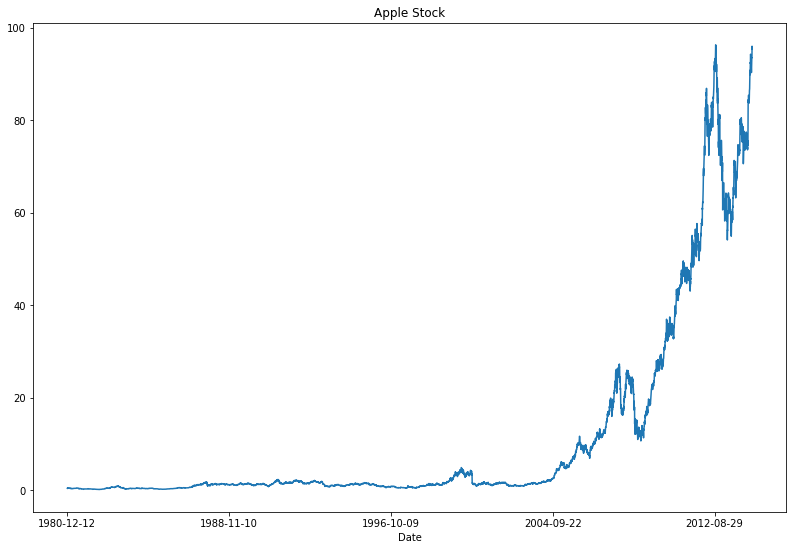

In [43]:
# makes the plot and assign it to a variable
appl_open = apple_pandas['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.